# Set working directory

In [1]:
import os
cwd = os.path.split(os.getcwd())
if cwd[-1] == 'tutorials':
    os.chdir('..')
!python --version

Python 3.8.2


# Import modules

In [2]:
from utils.bron_network_utils import load_graph_nodes
from meta_analysis.make_data_summary import load_graph_network, main_data_summary
from meta_analysis.meta_analysis_scripts.vendor_threat_data_types import threat_info_bar_graph
from meta_analysis.meta_analysis_scripts.data_types_over_versions import data_types_over_versions
from meta_analysis.meta_analysis_scripts.cve_connectivity_by_year import cve_connectivity_by_year
from meta_analysis.meta_analysis_scripts.make_edge_distributions import tactic_edge_hist, technique_edge_hist, capec_edge_hist, cwe_edge_hist, cve_cpe_edge_hist
from meta_analysis.meta_analysis_scripts.vendor_applications import make_vendor_to_cpes, make_vendor_to_num_cpes, vendor_num_apps_histogram
from meta_analysis.meta_analysis_scripts.cve_data_helper import line_plot_cvss_scores_by_year, density_plot_cvss_scores
from meta_analysis.meta_analysis_scripts.vendor_tactic_and_cvss import bron_id_to_cpe_id, cve_to_risk, make_heat_map, max_cve_risk_violin, max_cve_risk_violin_tactic
from utils.tutorial_util import print_files_in_folder

# Meta-analysis

There are several meta-analysis files that can be run on BRON. Make sure to first build BRON before running meta-analyses. A tutorial on how to build BRON is available in the `tutorials` folder.

# Make data summary

BRON can be used to make CSV files that contain data summaries of the threat data. For each type of threat data, the data summary includes how many and which edges are connected to both the next threat data layer and the previous layer. For CVEs, the vendors of CPEs that the CVE is connected to and the number of unique CPE products that the CVE is connected to are included. The CPE summary includes the vendor, product, and version of each CPE.

To make data summaries, run the following command:
```
python -m meta_analysis.make_data_summary --BRON_path BRON_PATH --save_folder SAVE_FOLDER 
```
Optional arguments:
```
--tactic --technique --cwe --cve --capec --cpe --not_all_cpe_versions
```
`BRON_PATH` is the file path of BRON, and `SAVE_FOLDER` is the folder path to save data summaries. To make a data summary for any threat data type, add the data type name as an argument. To make a data summary using only the latest version of CPEs, add the argument `--not_all_cpe_versions`.

It is important for the folder to save data summaries to be named as one of the following depending on the type of CVE data and CPE versions that are used:
```
* all_cves_all_versions (if using all years of CVE data and all versions of CPEs)
* recent_cves_all_versions (if using only recent years of CVE data and all versions of CPEs)
* all_cves_latest_version (if using all years of CVE data and only latest version of CPEs)
* recent_cves_latest_version (if using only recent years of CVE data and only latest version of CPEs)
```

In [3]:
out_path = 'example_data/example_output_data/'

In [4]:
BRON_path = os.path.join(out_path, 'BRON.json')
save_folder = os.path.join(out_path, 'all_cves_all_versions')
datatypes = ["tactic", "technique", "capec", "cwe", "cve", "cpe"]
not_all_cpe_versions = False
graph = load_graph_network(BRON_path, not_all_cpe_versions)
main_data_summary(graph, save_folder, datatypes)

tactic
technique
capec
cwe
cve
cpe


In [5]:
print_files_in_folder(out_path)

'example_data/example_output_data/BRON 1598530105.965684'
'example_data/example_output_data/all_cves_all_versions 1598530105.9690936'
'example_data/example_output_data/all_cves_latest_version 1598530105.9699273'
('example_data/example_output_data/search_result_ibm_business_process_manager.csv '
 '1598530105.9832911')
'example_data/example_output_data/figures 1601316149.9301994'
'example_data/example_output_data/BRON.json 1601396716.0232089'
'example_data/example_output_data/search_result_tactic.csv 1601396716.0810413'
('example_data/example_output_data/search_result_technique.csv '
 '1601396716.1440012')


# Number of data types for specific vendors

For a specific vendor, BRON can be used to find the number of data types (Tactics, Techniques, CAPECs, CWEs, CVEs, and CPEs) associated with that vendor. To plot the number of each data type for specific vendors, run the following command:
```
python meta_analysis/meta_analysis_scripts/vendor_threat_data_types.py --vendors VENDORS --search_result_folder_path SEARCH_RESULT_FOLDER_PATH --save_path SAVE_PATH
```
`VENDORS` is a comma-delimited string of vendor names, `SEARCH_RESULT_FOLDER_PATH` is the folder path to path search results for each vendor, and `SAVE_PATH` is the file path to save the figure. The path search results for given vendors (e.g. IBM) should be named as `search_result_ibm.csv`.

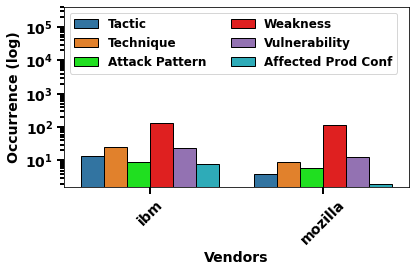

In [6]:
vendors_str = 'ibm,mozilla'
search_result_folder_path = 'example_data/example_input_data'
save_path = os.path.join(out_path, 'figures/ibm_mozilla_data_types.png')
vendors = [_.strip() for _ in vendors_str.split(',')]
threat_info_bar_graph(vendors, search_result_folder_path, save_path=save_path)
# TODO check why it changes with only one vendor

# Number of data types for specific vendor products

Similar to finding the number of data types for specific vendors, BRON can also find the number of data types for specific vendor products. To plot the number of data types for specific vendor products over all product versions, run the following command:
```
python meta_analysis/meta_analysis_scripts/data_types_over_versions.py --BRON_folder_path BRON_FOLDER_PATH --vendor VENDOR --product PRODUCT --starting_point_file STARTING_POINT_FILE --search_result_file SEARCH_RESULT_FILE --save_path SAVE_PATH
```
`BRON_FOLDER_PATH` is the folder path to BRON, `VENDOR` is the selected vendor, `PRODUCT` is the selected product of the given vendor, `STARTING_POINT_FILE` is the file path to an empty CSV file to save path search starting points, `SEARCH_RESULT_FILE` is the path to an empty CSV file to save path search results, and `SAVE_PATH` is the file path to save the new figure.

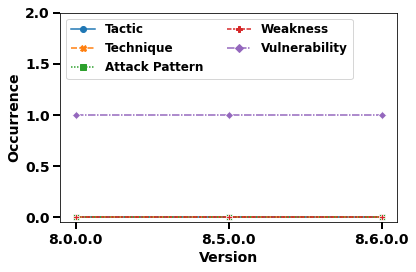

In [7]:
vendor = 'ibm'
product = 'business_process_manager'
starting_point_file = f'example_data/example_input_data/starting_point_{vendor}_{product}.csv'
search_result_file = os.path.join(out_path, f'search_result_{vendor}_{product}.csv')
save_path = os.path.join(out_path, f'figures/{vendor}_{product}.png')
data_types_over_versions(out_path, vendor, product, starting_point_file, search_result_file, save_path=save_path)

# Paths to Vulnerabilities

Because the different data types are linked together in the BRON graph, Vulnerabilities can be reached by paths from other data types. The number and percentage of Vulnerabilities connected to a Tactic, Attack Pattern, or Weakness can be drawn over specific years.

To plot the number or percentage of different Vulnerability paths over years, run the following command:
```
python meta_analysis/meta_analysis_scripts/cve_connectivity_by_year.py --years YEARS --search_result_folder_path SEARCH_RESULT_FOLDER_PATH --number_or_percent NUMBER_OR_PERCENT --BRON_folder_path BRON_FOLDER_PATH --save_path SAVE_PATH
```
`YEARS` is a comma-delimited string of years, `SEARCH_RESULT_FOLDER_PATH` is the folder path to path search results for each year, `NUMBER_OR_PERCENT` is either "number" or "percent" to determine plot type, `BRON_FOLDER_PATH` is the folder path to BRON, and `SAVE_PATH` is the file path to save the figure. The path search results for given years (e.g. 2018) should be named as `search_result_cve_2018.csv`.

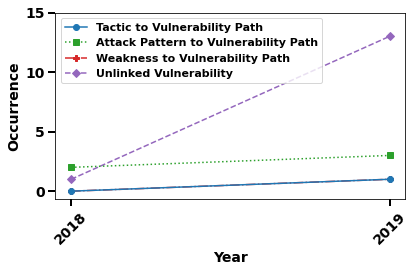

In [8]:
years = '2018,2019'
search_result_folder_path = 'example_data/example_input_data'
number_or_percent = 'number'
save_path = os.path.join(out_path, 'figures/2018_2019_cve_paths.png')
years_split = years.split(',')
cve_connectivity_by_year(years_split, search_result_folder_path, number_or_percent, out_path, save_path=save_path)

# Number of edges for data types

The data type nodes in BRON are linked to other data types by edges. The number of edges for Tactics, Techniques, Attack Patterns, Weaknesses, Vulnerabilities, and Affected Platform Configurations can be found. To plot the number of edges for a specific data type, run the following command:
```
python meta_analysis/meta_analysis_scripts/make_edge_distributions.py --data_summary_folder_path DATA_SUMMARY_FOLDER_PATH --data_type DATA_TYPE --save_path SAVE_PATH
```
`DATA_SUMMARY_FOLDER_PATH` is the folder path to subfolders of the data summaries, `DATA_TYPE` is the selected data type (either Tactic, Technique, CAPEC, CWE, CVE, or CPE), and `SAVE_PATH` is the file path to save the figure.

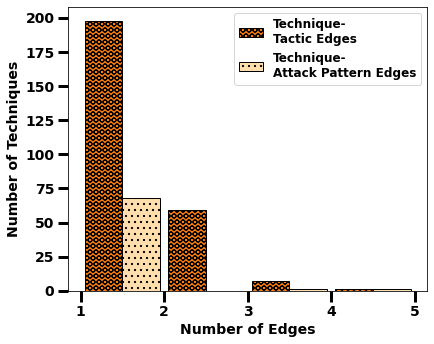

In [9]:
save_path = os.path.join(out_path, 'figures/technique_edges.png')
technique_edge_hist(out_path, save_path=save_path)

<Figure size 450x360 with 0 Axes>

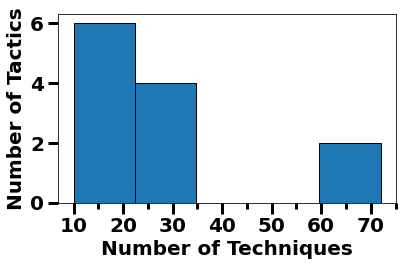

In [10]:
save_path = os.path.join(out_path, 'figures/tactic_edges.png')
tactic_edge_hist(out_path, save_path=save_path)

# Number of Affected Product Configurations across vendors

To plot the number of Affected Platform Configurations for different vendors, run the following command:
```
python meta_analysis/meta_analysis_scripts/vendor_applications.py --cpe_summary_all_versions_path CPE_SUMMARY_ALL_VERSIONS_PATH --cpe_summary_latest_version_path CPE_SUMMARY_LATEST_VERSION_PATH --save_path SAVE_PATH
```
`CPE_SUMMARY_ALL_VERSIONS_PATH` is the file path to `cpe_summary.csv` when all versions of Affected Platform Configurations are used, `CPE_SUMMARY_LATEST_VERSION_PATH` is the file path to `cpe_summary.csv` when only the latest version of Affected Platform Configurations are used, and `SAVE_PATH` is the file path to save the figure.

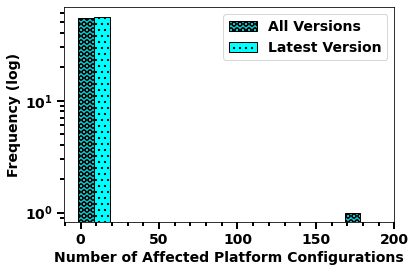

In [11]:
cpe_summary_all_versions = os.path.join(out_path, 'all_cves_all_versions/cpe_summary.csv')
cpe_summary_latest_version = os.path.join(out_path, 'all_cves_latest_version/cpe_summary.csv')
save_path = os.path.join(out_path, 'figures/vendor_applications.png')
vendor_to_cpes = make_vendor_to_cpes(cpe_summary_all_versions)
vendor_to_num_cpes = make_vendor_to_num_cpes(vendor_to_cpes)
num_cpes = list(vendor_to_num_cpes.values())
vendor_to_cpes_versioning = make_vendor_to_cpes(cpe_summary_latest_version)
vendor_to_num_cpes_versioning = make_vendor_to_num_cpes(vendor_to_cpes_versioning)
num_cpes_versioning = list(vendor_to_num_cpes_versioning.values())
vendor_num_apps_histogram(num_cpes, num_cpes_versioning, save_path=save_path)

# CVSS scores by year

To plot a line plot of CVSS scores by year or a density plot of CVSS scores, run the following command:
```
python meta_analysis/meta_analysis_scripts/cve_data_helper.py --years YEARS --data_summary_folder_path DATA_SUMMARY_FOLDER_PATH --plot_type PLOT_TYPE --save_path SAVE_PATH
```
`YEARS` is a comma-delimited string of years, `DATA_SUMMARY_FOLDER_PATH` is the folder path to subfolders of data summaries, `PLOT_TYPE` is either a 'line-plot' of CVSS scores by year or a 'density-plot' of CVSS scores, and `SAVE_PATH` is the file path to save the figure.

It is important for the data summary folder containing subfolders to have the following subfolder names:
```
* all_cves_all_versions
* recent_cves_all_versions
* all_cves_latest_version
* recent_cves_latest_version
```

Each of the subfolders should contain data summaries for all threat data types:
```
* tactic_summary.csv
* technique_summary.csv
* capec_summary.csv
* cwe_summary.csv
* cve_summary.csv
* cpe_summary.csv
```
Refer to `meta_analysis/make_data_summary.py` to create data summaries for all threat data types.

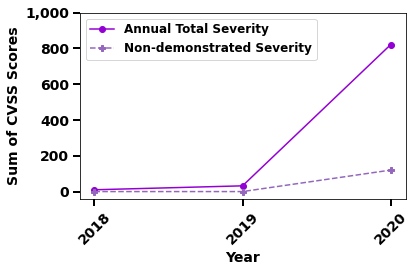

In [12]:
years = '2018,2019,2020'
plot_type = 'line-plot'
save_path = os.path.join(out_path, 'figures/cvss_scores_by_year.png')
years_split = years.split(',')
line_plot_cvss_scores_by_year(out_path, years_split, save_path=save_path)

# Tactics and CVSS scores for specific vendors

BRON can be used to plot a heatmap or violin plot of different tactics and vendors. The heatmap shows the number of unique products of each vendor affected by each tactic. The violin plot can show the CVSS scores of products of each vendor affected by either all tactics or two specific tactics for comparison. To plot the heatmap or violin plot, run the following command:
```
python meta_analysis/meta_analysis_scripts/vendor_tactic_and_cvss.py --tactics TACTICS --vendors VENDORS --tactic_search_result_file TACTIC_SEARCH_RESULT_FILE --vendor_search_result_folder VENDOR_SEARCH_RESULT_FOLDER --plot_type PLOT_TYPE --cve_summary_path CVE_SUMMARY_PATH --BRON_folder_path BRON_FOLDER_PATH --save_path SAVE_PATH --violin_stick (optional)
```
`TACTICS` is a comma-delimited string of tactic names, `VENDORS` is a comma-delimited string of vendor names, `TACTIC_SEARCH_RESULT_FILE` is the file path to path search results for the selected tactics, `VENDOR_SEARCH_RESULT_FOLDER` is the folder path to path search results for the selected vendors, `PLOT_TYPE` is either "heatmap", "violinplot", or "two-tactic-violinplot", `CVE_SUMMARY_PATH` is the file path to `cve_summary.csv` when all Vulnerabilities and all versions of Affected Platform Configurations are used, `BRON_FOLDER_PATH` is the folder path to BRON, and `SAVE_PATH` is the file path to save the figure. To add sticks to the violin plots, use the argument `--violin_stick`.

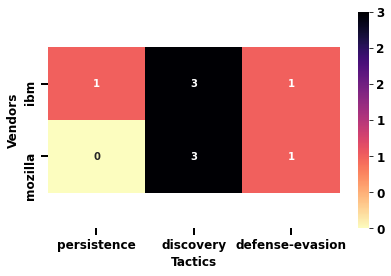

In [14]:
tactics = 'persistence,discovery,defense-evasion'
vendors = 'ibm,mozilla'
tactic_search_result_file = os.path.join(out_path, 'search_result_tactic.csv')
vendor_search_result_folder = 'example_data/example_input_data'
plot_type = 'heatmap'
cve_summary_path = os.path.join(out_path, 'all_cves_all_versions/cve_summary.csv')
save_path = os.path.join(out_path, 'figures/vendor_tactics.png')
tactics_split = tactics.split(',')
vendors_split = vendors.split(',')
bron_id_to_cpe_id_dict = bron_id_to_cpe_id(out_path)
cve_to_risk_dict = cve_to_risk(cve_summary_path)
all_tactics_name_to_id = {"persistence": "tactic_00008", "privilege-escalation": "tactic_00021",
                          "discovery": "tactic_00014", "initial-access": "tactic_00089",
                          "lateral-movement": "tactic_00026", "execution": "tactic_00038",
                          "credential-access": "tactic_00006", "defense-evasion": "tactic_00012",
                          "impact": "tactic_00240", "command-and-control": "tactic_00002",
                          "exfiltration": "tactic_00004", "collection": "tactic_00010"}
tactic_ids = []
for tactic in tactics_split:
    tactic_ids.append(all_tactics_name_to_id[tactic])
make_heat_map(tactics_split, vendors_split, tactic_ids, tactic_search_result_file, bron_id_to_cpe_id_dict, save_path=save_path)